## Idea: 

* Make a logistic regression algorithm from scratch and present the work in a streamlit app. 


https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset/code

Use : 
https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py

https://towardsdatascience.com/logistic-regression-explained-593e9ddb7c6c

https://towardsdatascience.com/how-to-best-evaluate-a-classification-model-2edb12bcc587

Good resource on encoding categorical variables and also a cool data set: 
https://www.kaggle.com/prashant111/eda-logistic-regression-pca

Cool resource and courses. Great interactive plots: 

https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/playground-exercise-examining-l2-regularization

This data set could also be nice to work with: 

https://archive.ics.uci.edu/ml/datasets/Census+Income

https://www.graphpad.com/guides/prism/latest/curve-fitting/reg_logistic_roc_curves.htm

This is an interesting article about how to adjust the decision threshold: 
https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

https://www.scikit-yb.org/en/latest/api/classifier/threshold.html

ROC: 

https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/

Cool app: 
https://share.streamlit.io/sebastiandres/ml-edu-1-confusion-matrix/main

Sidebar: 

https://ruslanmv.com/blog/Web-Application-Classification
Outline: 

* An explanation of l1, l2 regularization in logistic regression on a real data set. 
* First show how you would use l1 and l2 regularization using scikit learn. Then go into the details of what that means (writing it from scratch). 

* show that l1 is robust against outliers and leads to sparse solutions. Also show it is slower. 

New Idea: 

* This is a very unbalanced data set so I could explore the options of oversampling and changing the decision threshold, both of which are decent ways to deal with this. Or at least are possible ways to deal with this: 



Concept: 

* An applet exploring the concepts of binary classification with logistic regression. 
* To include: 
    * Sparsity, Over/undersampling, decision threshold, confusion matrix, roc curve
    * Have the ability to select a set of features to see on the regression curves. 
    * What do we value? If we are designing a screening feature do we value catching all we can (very low fnr (is that right?)
    * Make it neat and include links to resources. 
    * Start building the app. 
    * Try not to include things that come prepackaged, meaning that you don't get what's going on under the hood. 

Current Goal: 

* Try to get the threshold, lambda, and the sampling condition to be sliders and show plots of: 
    * Regression curves with a horizontal line. 
    * roc curve. 
    * precision vs accuracy curve. 
* Then discuss how it depends on the desired utility of the model which hyperparameters are best. 



## For Tuesday Morning: 

* Get it working more or less. Add some little descriptions of the concepts at play. 
* Publish it on github. 
* Properly cite all data sets and articles. 
* NExt work on clustering of tracks. 

In [1]:
import hydralit
hydralit.__version__

2022-02-15 15:36:15.105 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


'1.0.12'

In [1]:
import sklearn
sklearn.__version__

'1.0.2'

In [2]:
%load_ext autoreload

In [3]:

import pandas as pd
pd.set_option("display.max_columns", 30)

In [4]:
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

print(np.__version__)

1.20.0


In [5]:
data_path = "/home/drew/DataScience/projects/streamlit/heart_disease/dataset/heart_disease_health_indicators_BRFSS2015.csv"
heart_data = pd.read_csv(data_path)

In [6]:
heart_data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
heart_data.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
all_X = heart_data.drop("HeartDiseaseorAttack", axis = 1)
all_y = heart_data["HeartDiseaseorAttack"]

Notes: 

* Scaler isn't working. Wait yet it is working. 

In [9]:
from sklearn.model_selection import train_test_split

# all_X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(all_X, all_y)

from sklearn.preprocessing import StandardScaler

# perform a robust scaler transform of the dataset
scaler = StandardScaler()

X_train_np = scaler.fit_transform(X_train.to_numpy())
X_train = pd.DataFrame(X_train_np, columns= all_X.columns)

X_test_np = scaler.transform(X_test.to_numpy())
X_test = pd.DataFrame(X_test_np, columns= all_X.columns)

display(X_test.describe())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000,63420.000000
mean,0.003516,-0.001904,-0.000277,-0.001108,0.010171,-0.002341,0.002116,-0.008584,0.001026,-0.001949,-0.002735,-0.004958,0.011598,-0.001624,-0.001065,0.007883,-0.003243,0.001461,-0.007878,-0.005779,-0.008896
std,1.000509,0.999715,1.000685,0.998436,1.001145,0.994547,1.001808,1.005114,0.999722,1.001558,0.994728,1.010340,1.017270,1.002290,1.002243,1.010661,0.997126,1.000183,1.001533,1.006986,1.007505
min,-0.866016,-0.858595,-5.079093,-2.478220,-0.889838,-0.205942,-0.424955,-1.767227,-1.316521,-2.075608,-0.244377,-4.420633,-0.301594,-1.415746,-0.430136,-0.485926,-0.450206,-0.886695,-2.305293,-4.117538,-2.446966
25%,-0.866016,-0.858595,0.196886,-0.663139,-0.889838,-0.205942,-0.424955,0.565858,-1.316521,0.481786,-0.244377,0.226212,-0.301594,-0.479298,-0.430136,-0.485926,-0.450206,-0.886695,-0.667576,-1.068906,-0.512022
50%,-0.866016,-0.858595,0.196886,-0.209369,-0.889838,-0.205942,-0.424955,0.565858,0.759578,0.481786,-0.244377,0.226212,-0.301594,-0.479298,-0.430136,-0.485926,-0.450206,-0.886695,-0.012490,-0.052696,0.455451
75%,1.154713,1.164694,0.196886,0.395658,1.123800,-0.205942,-0.424955,0.565858,0.759578,0.481786,-0.244377,0.226212,-0.301594,0.457149,-0.160183,-0.140885,-0.450206,1.127784,0.642597,0.963515,0.939187
max,1.154713,1.164694,0.196886,10.529859,1.123800,4.855741,2.441016,0.565858,0.759578,0.481786,4.092044,0.226212,3.315712,2.330045,3.619164,2.964478,2.221206,1.127784,1.625226,0.963515,0.939187


In [10]:
# train a logistic regression model on the training set
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# from yellowbrick.classifier import roc_auc
# from yellowbrick.datasets import load_spam
from sklearn.linear_model import LogisticRegression
# from yellowbrick.classifier import DiscriminationThreshold

## Use the below as a starting point: 

In [12]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

lambda_max = np.max(np.abs((2 * X_train.values.T.dot(y_train - np.average(y_train)))))
print(lambda_max)
%matplotlib inline
@interact
def model_viz(
                lam_final = widgets.FloatSlider(value=2,min=1,max=lambda_max,step=1),
                sample_coeff = widgets.FloatSlider(value=.5,min=0,max=1,step=.01),
                threshold = widgets.FloatSlider(value=.5,min=0,max=1,step=.01)):

    oversample = RandomOverSampler(sampling_strategy=sample_coeff)
    # fit and apply the transform
    X_over, y_over = oversample.fit_resample(X_train, y_train)
    # summarize class distribution

    lr = LogisticRegression(C=1/lam_final, solver = "liblinear",penalty = "l2")
    
    # apply threshold to positive probabilities to create labels
    def to_labels(pos_probs, threshold):
            return (pos_probs >= threshold).astype('int')

    # # fit a model
    lr.fit(X_over, y_over)
    # predict probabilities
    yhat = lr.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = yhat[:, 1]
    # define thresholds
    thresholds = arange(0.01, 1, 0.05)
    # evaluate each threshold
    scores_f1 = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
    scores_accuracy = [accuracy_score(y_test, to_labels(probs, t)) for t in thresholds]

    precision = [precision_recall_fscore_support(y_test, to_labels(probs, t), average='binary',zero_division = 0)[0] for t in thresholds]
    recall = [precision_recall_fscore_support(y_test, to_labels(probs, t), average='binary',zero_division = 0)[1] for t in thresholds]
    support = [precision_recall_fscore_support(y_test, to_labels(probs, t), average='binary',zero_division = 0)[2] for t in thresholds]

    # get best threshold
    ix = argmax(scores_f1)
    print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores_f1[ix]))

    # get best threshold
    ix = argmax(scores_accuracy)
    print('Threshold=%.3f, Accuracy=%.5f' % (thresholds[ix], scores_accuracy[ix]))

    plt.plot(thresholds, scores_f1)

    plt.plot(thresholds, scores_accuracy)
    plt.plot(thresholds, precision)
    plt.plot(thresholds, recall)
    plt.plot(thresholds, scores_f1)
    # only one line may be specified; full height
    plt.axvline(x=threshold, color='b', label='axvline - full height')
    
    
    cm = confusion_matrix(y_test, to_labels(probs, threshold), normalize = "true")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
    disp.plot()

    plt.show()
    
    lam_list = []
    accuracy_list = []

    # Create an empty df to save regularization path. 
    regularization_path = pd.DataFrame(columns=X_train.columns)
#     confusion_matrixs = pd.DataFrame(columns=["tn", "fp", "fn", "tp"])

    lambda_max = np.max(np.abs((2 * X_train.values.T.dot(y_train - np.average(y_train)))))
    print(lambda_max)
    lam = lambda_max  
    condition = True
    i = 0
    while condition:

        lam_list.append(lam)
        lr = LogisticRegression(C=1/lam, solver = "liblinear",penalty = "l2")

        lr.fit(X_train, y_train)

        y_predicted=lr.predict(X_test)

        regularization_path.loc[i] = lr.coef_[0]
#         tn, fp, fn, tp = confusion_matrix(y_test, y_predicted, normalize = True).ravel()

        lam = lam / 5
        condition = (lam > 1)
        i+=1


    regularization_path["lambda"] = lam_list
    regularization_path = regularization_path.set_index("lambda", drop = True)
    
    # Make this something you can click. 
    columns_of_interest = ["Age","GenHlth", "Smoker", "HighChol", "Diabetes", "BMI"]
    sns.lineplot(data=regularization_path[columns_of_interest])
    plt.xscale("log")
    plt.axvline(x=lam_final, color='b', label='axvline - full height')
    plt.show()
    

28837.868213339327


interactive(children=(FloatSlider(value=2.0, description='lam_final', max=28837.868213339327, min=1.0, step=1.…

In [ ]:
lam_list = []
accuracy_list = []

# Create an empty df to save regularization path. 
regularization_path = pd.DataFrame(columns=X_train.columns)
confusion_matrixs = pd.DataFrame(columns=["tn", "fp", "fn", "tp"])

lambda_max = np.max(np.abs((2 * X_train.values.T.dot(y_train - np.average(y_train)))))
print(lambda_max)
lam = lambda_max  
condition = True
i = 0
while condition:

    lam_list.append(lam)
    lr = LogisticRegression(C=1/lam, solver = "liblinear",penalty = "l1")
    
    lr.fit(X_train, y_train)
    #I make the predictions
    y_predicted=lr.predict(X_test)
    
    regularization_path.loc[i] = lr.coef_[0]
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    confusion_matrixs.loc[i] = [tn, fp, fn, tp]
#     p
    lam = lam / 4
    condition = (lam > 1)
    i+=1

    
regularization_path["lambda"] = lam_list
regularization_path = regularization_path.set_index("lambda", drop = True)

confusion_matrixs["lambda"] = lam_list
confusion_matrixs = confusion_matrixs.set_index("lambda", drop = True)

In [ ]:
columns_of_interest = ["Age","GenHlth", "Smoker", "HighChol", "Diabetes", "BMI"]
sns.lineplot(data=regularization_path[columns_of_interest])
plt.xscale("log")
plt.show()
# plt.savefig("A6_plot_3.pdf")
# plt.cla()
# plt.clf()

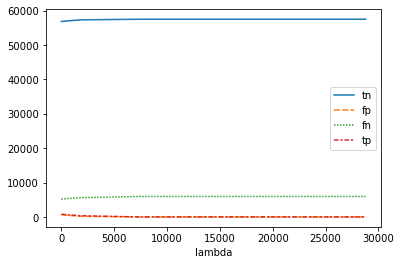

In [17]:

sns.lineplot(data=confusion_matrixs)
# plt.xscale("log")
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV


lr = LogisticRegression(C=1/lam, solver = "liblinear",penalty = "l1")

parameters_lr = [{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = lr,
                           param_grid = parameters_lr,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_lr.fit(X_train, y_train)
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_  
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

Best Accuracy of LR: 90.73 %
Best Parameter of LR: {'C': 0.001, 'penalty': 'l2'}


In [43]:
lam = 1000
lr = LogisticRegression(C=1/lam, solver = "liblinear",penalty = "l1")
# lr = LogisticRegression()

In [37]:
lr.fit(X_train, y_train)

lr.get_params()
lr.coef_

array([[ 0.20021918,  0.235648  ,  0.        ,  0.        ,  0.11782132,
         0.17103816,  0.0846555 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.47164569,  0.        ,
         0.00469164,  0.1052271 ,  0.26126339,  0.59571234,  0.        ,
        -0.04314869]])

## Ok undersampling may be necessary here. 

In [19]:
# example of evaluating a model with random oversampling and undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# define pipeline
over = RandomOverSampler(sampling_strategy=0.25)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.815


In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#I make the predictions
y_predicted=lr.predict(X_test)

#I obtain the accuracy of this fold
ac=accuracy_score(y_predicted,y_test, normalize = True)
ac_zeros=accuracy_score(np.zeros_like(y_test),y_test, normalize = True)

print(ac_zeros)
print(ac)
#I obtain the confusion matrix
cm=confusion_matrix(y_test, y_predicted , labels=lr.classes_)

tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()

print(classification_report(y_test, y_predicted))
from sklearn.metrics import precision_recall_fscore_support

report = precision_recall_fscore_support(y_test, y_predicted, average='binary')
print(report)

0.9045884578997162
0.9071901608325449
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     57369
         1.0       0.56      0.13      0.21      6051

    accuracy                           0.91     63420
   macro avg       0.74      0.56      0.58     63420
weighted avg       0.88      0.91      0.88     63420

(0.5579761068165847, 0.13121798049909106, 0.21246989563821247, None)


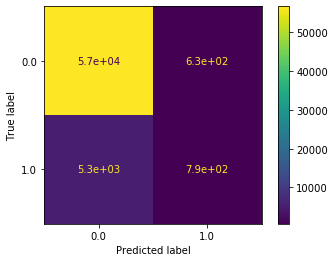

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

plt.show()

Best Threshold=0.093246


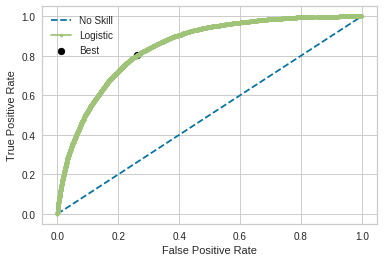

[1.91697775e+00 9.16977749e-01 9.10111158e-01 ... 1.07923387e-03
 1.07916542e-03 6.99633445e-04]


In [31]:
# roc curve for logistic regression model with optimal threshold
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(thresholds)

Threshold=0.210, F-Score=0.41823
Threshold=0.610, Accuracy=0.90870


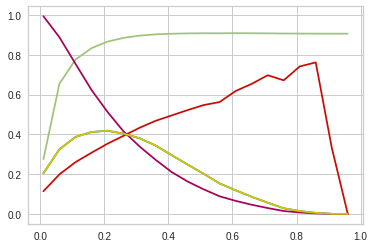

In [47]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
 
# # generate dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# # split into train/test sets
# trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# # fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = arange(0.01, 1, 0.05)
# evaluate each threshold
scores_f1 = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
scores_accuracy = [accuracy_score(y_test, to_labels(probs, t)) for t in thresholds]

precision = [precision_recall_fscore_support(y_test, to_labels(probs, t), average='binary',zero_division = 0)[0] for t in thresholds]
recall = [precision_recall_fscore_support(y_test, to_labels(probs, t), average='binary',zero_division = 0)[1] for t in thresholds]
support = [precision_recall_fscore_support(y_test, to_labels(probs, t), average='binary',zero_division = 0)[2] for t in thresholds]

# get best threshold
ix = argmax(scores_f1)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores_f1[ix]))

# get best threshold
ix = argmax(scores_accuracy)
print('Threshold=%.3f, Accuracy=%.5f' % (thresholds[ix], scores_accuracy[ix]))

plt.plot(thresholds, scores_f1)

plt.plot(thresholds, scores_accuracy)
plt.plot(thresholds, precision)
plt.plot(thresholds, recall)
plt.plot(thresholds, scores_f1)

In [43]:
from yellowbrick.classifier import roc_auc
from yellowbrick.datasets import load_spam
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import DiscriminationThreshold

%matplotlib inline
@interact
def model_viz(
                lam = widgets.FloatSlider(value=2,min=1,max=100,step=1),
                sample_coeff = widgets.FloatSlider(value=.5,min=0,max=1,step=.01)):

    oversample = RandomOverSampler(sampling_strategy=sample_coeff)
    # fit and apply the transform
    X_over, y_over = oversample.fit_resample(X_train, y_train)
    # summarize class distribution

    lr = LogisticRegression(C=1/lam, solver = "liblinear",penalty = "l1")
    visualizer_1 = roc_auc(lr, X_over, y_over)
    visualizer_1.show()
    
    visualizer = DiscriminationThreshold(lr)
    visualizer.fit(X_over, y_over)        # Fit the data to the visualizer
    visualizer.show() 

interactive(children=(FloatSlider(value=2.0, description='lam', min=1.0, step=1.0), FloatSlider(value=0.5, des…